In [1]:
import json as json
import matplotlib.pyplot as plt
import os
import numpy as np

import multifil
import treatment_definitions as td
import graphing_utilities as gutil

# List valid things that can be changed
print("valid constant (phenotype) parameters\n", multifil.hs.hs.VALID_PARAMS)

imported myosin multifil
valid constant (phenotype) parameters
 ['mf_k', 'mh_c_ks', 'mh_c_kw', 'mh_c_rs', 'mh_c_rw', 'mh_g_ks', 'mh_g_kw', 'mh_g_rs', 'mh_g_rw', 'detachment_rate', 'mh_fd_k0', 'mh_fd_delta', 'af_k', 'ti_a', 'ti_b']


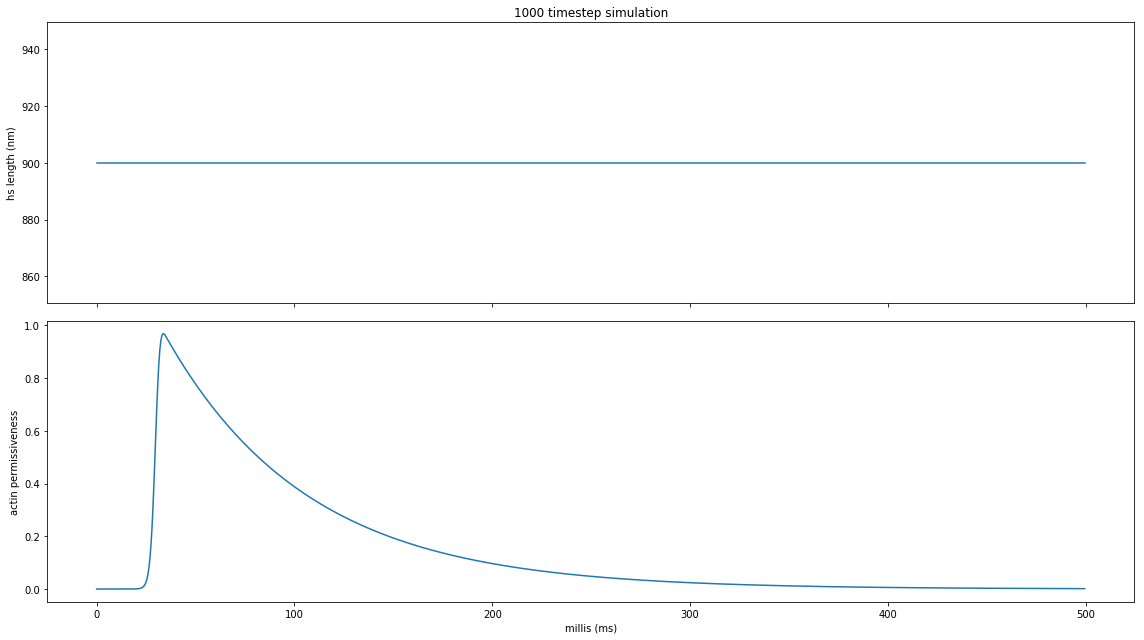

{'mh_c_ks': 40, 'mh_c_kw': 40}


In [2]:
# Setup experiment, show the traces
time_trace, length_trace, ap_trace, params = td.t_spring()

#plot the traces
gutil.plot_input_traces(time_trace, length_trace, ap_trace)

#print the phenotype settings
print(params)

In [3]:
output_dir = "../_output/"
os.makedirs(output_dir, exist_ok=True)
batch_size = 5

"""Here's the simulation loop"""
for stiffness in [20, 60, 80, 100]:
    # establish the settings
    time_trace, length_trace, ap_trace, params = td.t_spring(stiffness=stiffness)
    
    meta_files = []
    # create the metafiles
    for i in range(batch_size):
        # check the comment to see what we are passing to it.
        wl_meta = multifil.aws.metas.emit(
            path_local=output_dir,  # local dir to save run output to
            path_s3=None,  #s3 bucket to upload results to
            time=time_trace,
            poisson=0.0,  # poisson ratio, set to const lattice here
            ls=None,  # intial ls, using default by passing none
            z_line=length_trace, 
            actin_permissiveness=ap_trace,
            comment=str(stiffness),  # comment describing run
            hs_params=params,  # constants we want to alter - phenotype
            write=True,  # whether to write out resulting file or just pass back to variable
        )
        # find where it went
        run_name = wl_meta['name']
        print(run_name)
        run_file = output_dir + run_name + ".meta.json"
        
        # add it to the list
        meta_files.append(run_file)
    
    # give the manager_async the metafile
    run_manager = multifil.aws.run.manage_async(meta_files, use_sarc=False, unattended=False) # have run.py create the sarc from meta
    # Begin running
    run_manager.run_and_save()   # with our new sarc, run it

be0a2992-69a9-11ea-8c30-185680feb82e
be0b1380-69a9-11ea-9ab8-185680feb82e
be0c2038-69a9-11ea-9353-185680feb82e
be0ce428-69a9-11ea-bb2c-185680feb82e
be0dcc86-69a9-11ea-a56e-185680feb82e
272.8333477973938 seconds
61e0ac8c-69aa-11ea-8b34-185680feb82e
61e194e2-69aa-11ea-98b1-185680feb82e
61e257b4-69aa-11ea-85ea-185680feb82e
61e3416e-69aa-11ea-91f4-185680feb82e
61e40438-69aa-11ea-b62c-185680feb82e
285.9141309261322 seconds
0d8fad80-69ab-11ea-abc2-185680feb82e
0d90721a-69ab-11ea-a651-185680feb82e
0d9159f4-69ab-11ea-b619-185680feb82e
0d9243b8-69ab-11ea-ad51-185680feb82e
0d931310-69ab-11ea-a480-185680feb82e
283.71137285232544 seconds
b7f9d586-69ab-11ea-892f-185680feb82e
b7faba68-69ab-11ea-b362-185680feb82e
b7fb7e9c-69ab-11ea-ab6e-185680feb82e
b7fc6706-69ab-11ea-981a-185680feb82e
b7fd465c-69ab-11ea-a542-185680feb82e
284.84022092819214 seconds


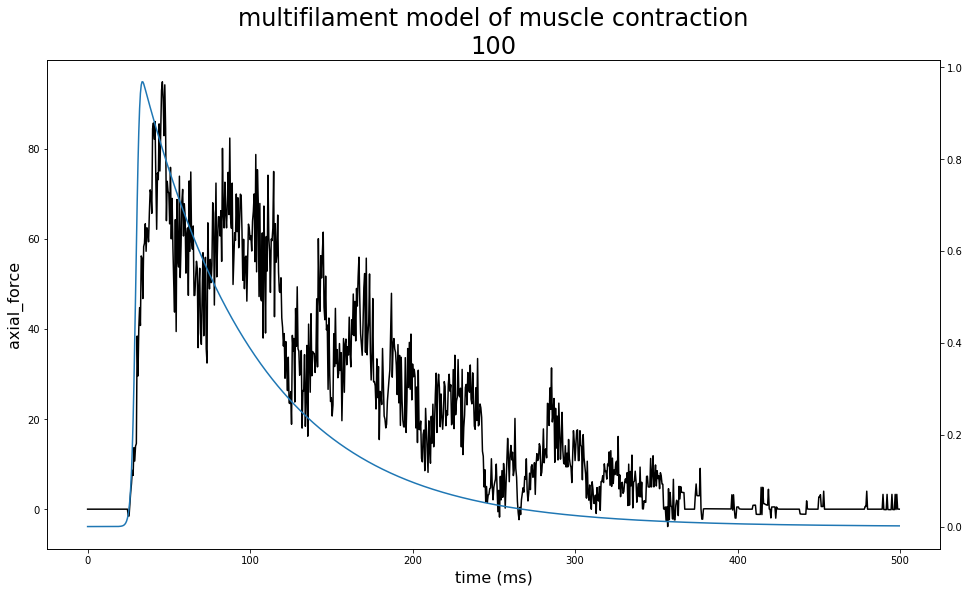

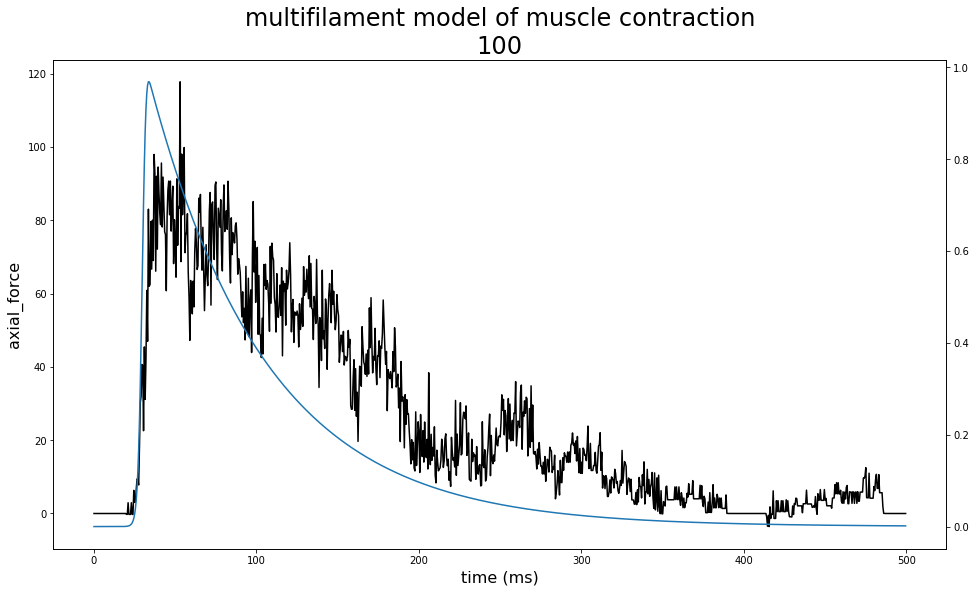

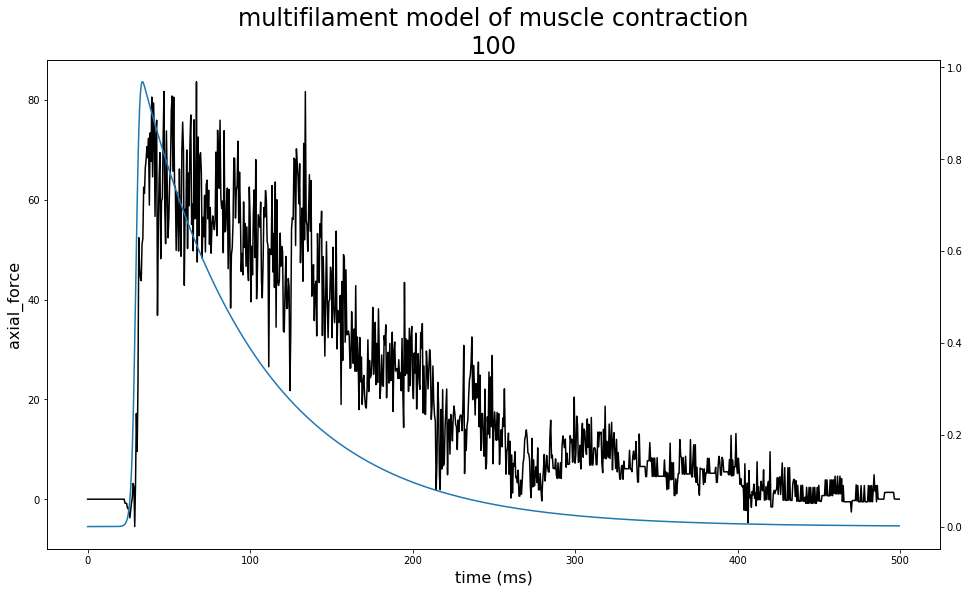

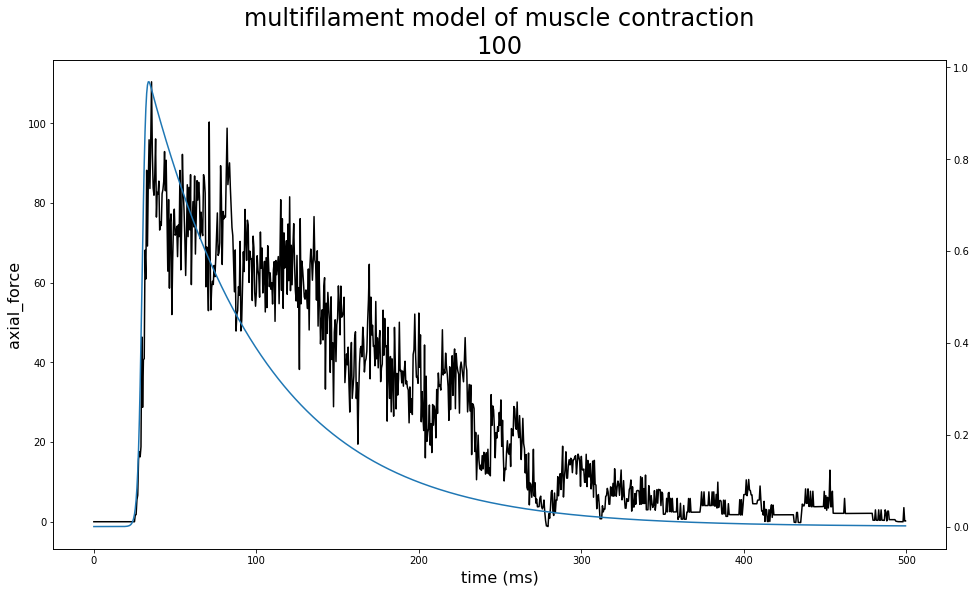

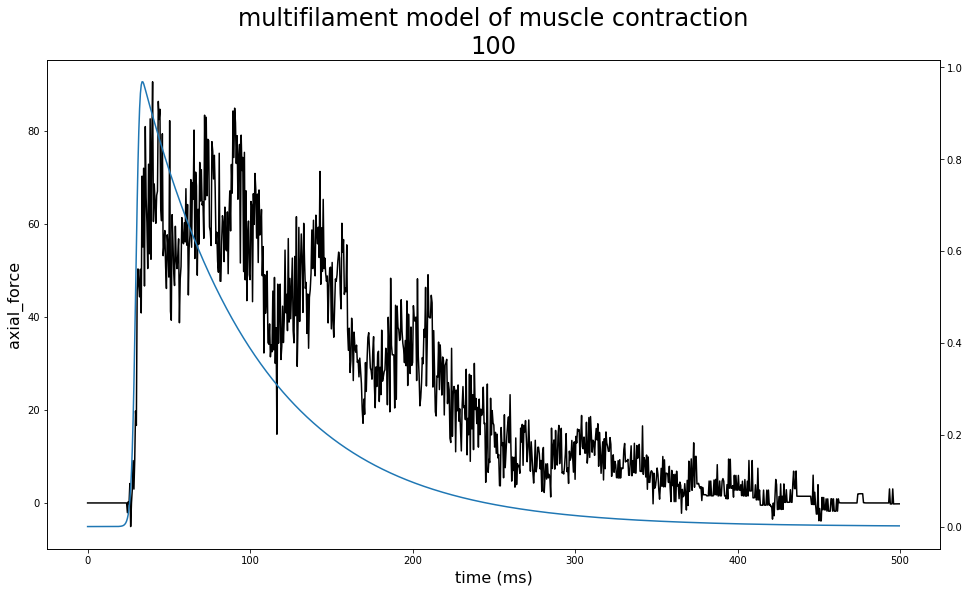

In [4]:
for run_file in meta_files:
    data_name = run_file.split('.meta')[0] + '.data.json'

    with open(data_name, 'r') as file:
        data = json.load(file)

#     for key in data.keys():
#         print(key, end=", ")

    print()
    print()
    # print_constants(data['constants'])

    key = "axial_force"
    fs = 16

    # recreate time trace in milliseconds
    time_trace = data['timestep'].copy()
    for i in range(len(time_trace)):
        time_trace[i] *= data['timestep_length']

    # plot
    fig, axes = plt.subplots(figsize=(16, 9))
    axes.plot(time_trace, data[key], color='black')

    title = "multifilament model of muscle contraction\n" + wl_meta['comment']
    plt.title(title, fontsize=fs*1.5)
    plt.xlabel("time (ms)", fontsize=fs)
    plt.ylabel(key, fontsize=fs)

    ax2 = plt.twinx()
    ax2.plot(time_trace, data['actin_permissiveness'])

    save = True # OI! make sure you know whats going on here in this statement
    if save:
        plt.savefig(output_dir + str(run_name) + ".png")
    plt.show()